In [ ]:
1. Средняя задержка рейсов в авиакомпаниях  
    На основании представленных данных можно предположить, что в анализируемых авиакомпаниях существуют проблемы, требующие внимания.
    Рекомендуется провести локальную проверку и взаимодействие с руководством авиакомпаний с целью выявления причин и уменьшения времени задержки.

2. Средняя задержка по аэропортам отправления  
    Анализ средней задержки по аэропортам отправления указывает на наличие проблем в представленных аэропортах. Рекомендуется взаимодействие
    с руководством аэропортов для выявления причин задержек и разработки мер по их снижению.

3. Зависимость задержки от расстояния  
    Наблюдается, что для рейсов дальностью 3000-4000 метров характерны значительные задержки, тогда как для рейсов длиной 2000-3000 метров задержки,
    как правило, меньше. Это может свидетельствовать о наличии определенных факторов, влияющих на время задержки, которые требуют дальнейшего изучения.

4. Зависимость задержки от дня недели  
    Анализ показывает, что понедельник и четверг являются днями с наибольшими задержками, в то время как суббота демонстрирует лучшие результаты. 
    Рекомендуется рассмотреть возможные отличия в операционных процессах в субботу по сравнению с понедельником и четвергом для разработки стратегий
    по снижению задержек в эти дни.

5. Зависимость задержки от времени вылета  
    Данные свидетельствуют о том, что в ночное время наблюдаются более значительные задержки, которые к утру уменьшаются. Рекомендуется 
    проанализировать причины данного явления с целью оптимизации времени вылетов в течение суток и снижения общего уровня задержек.



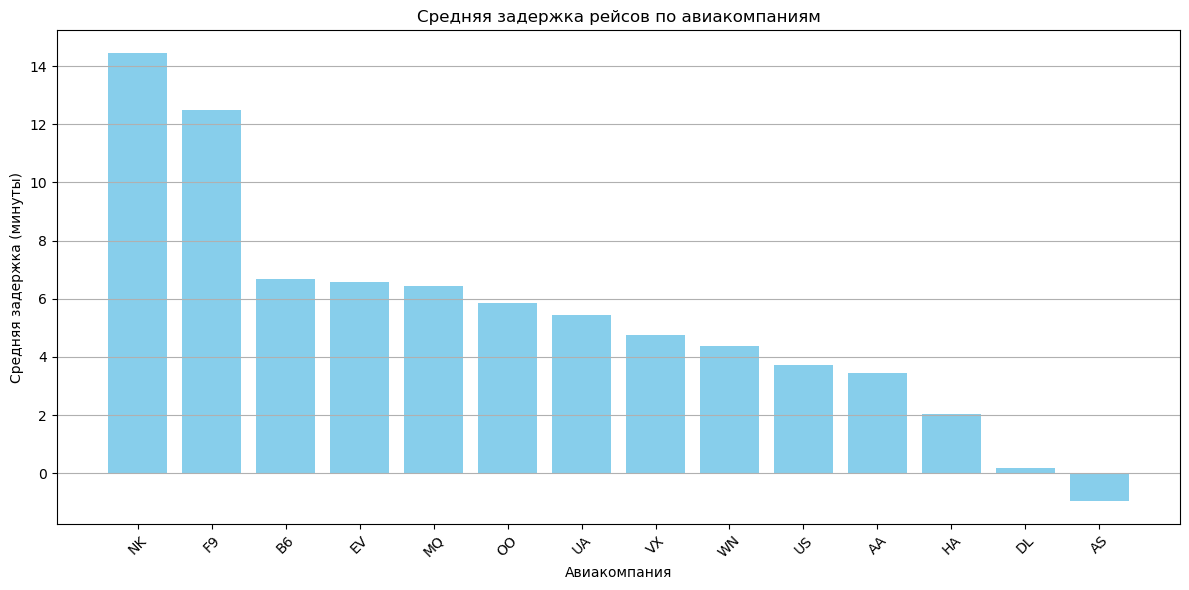

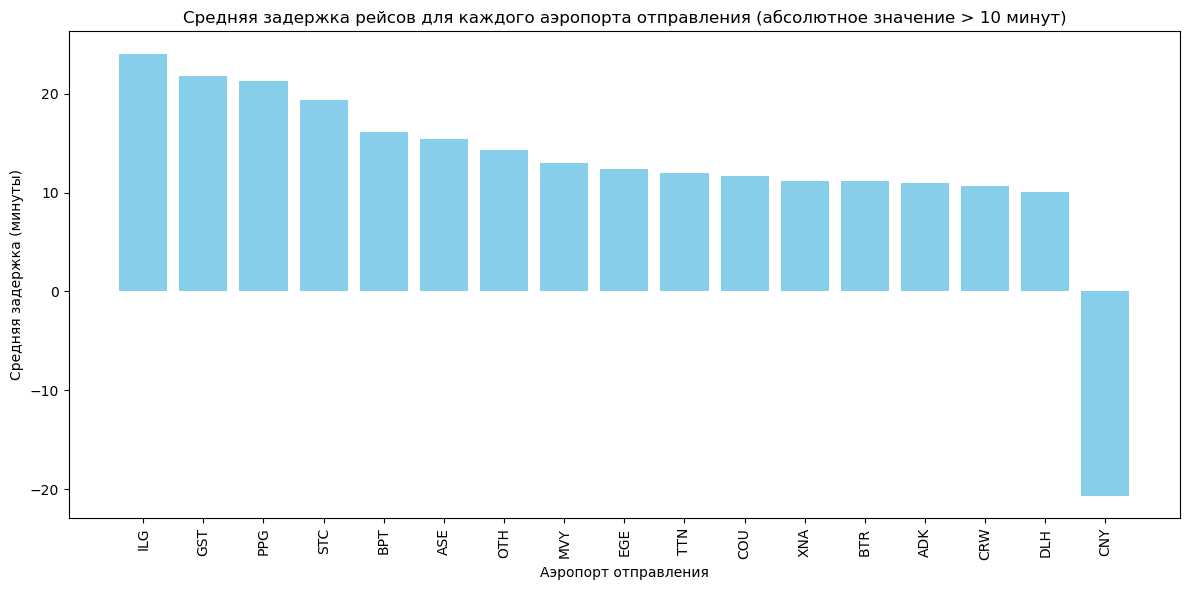

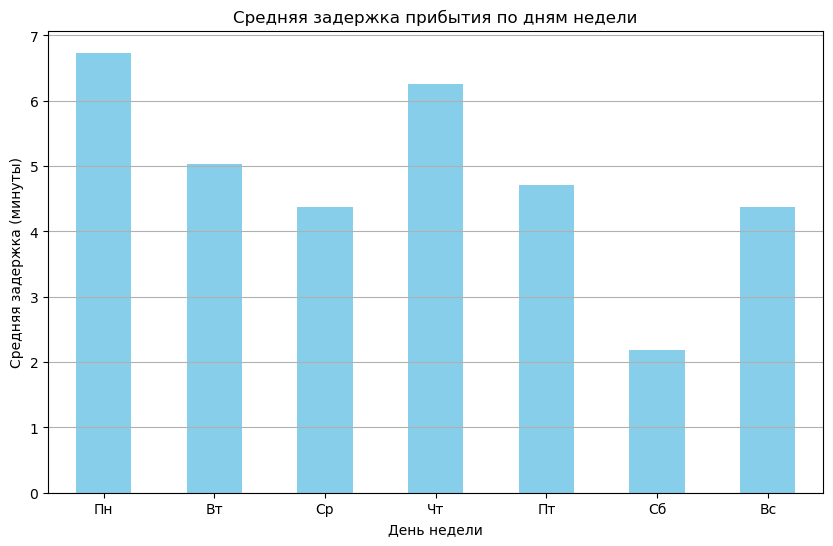

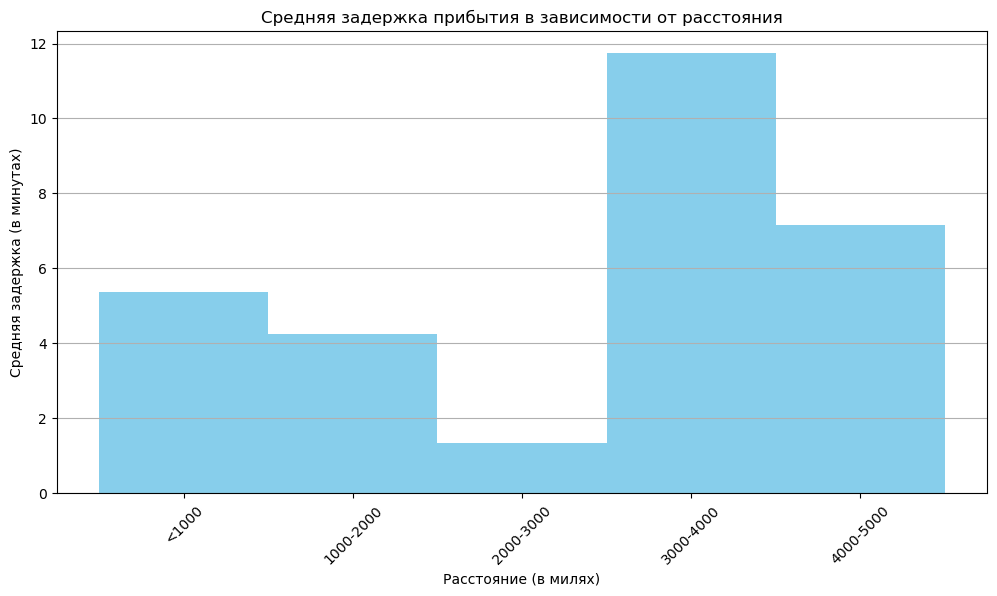

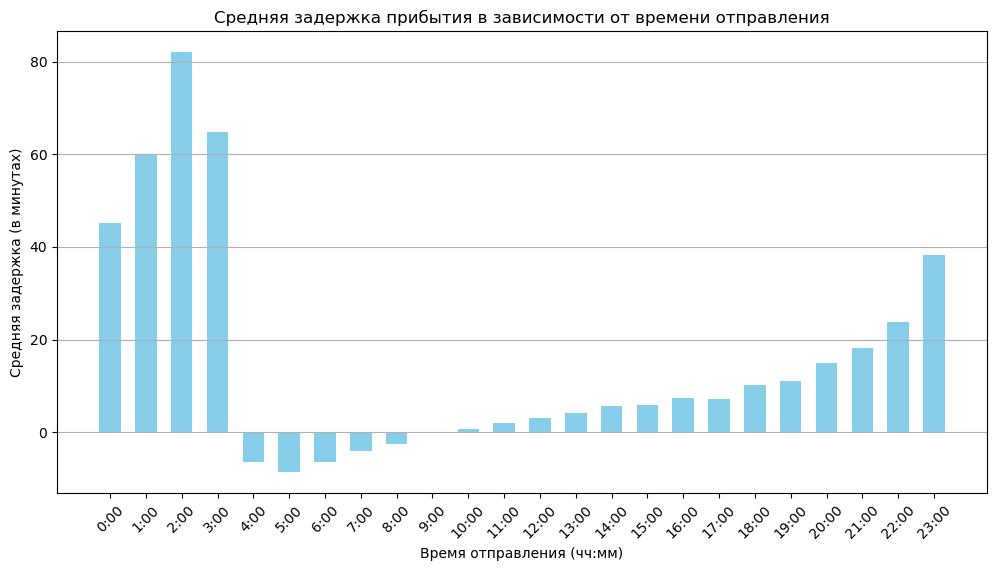

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv('flights.csv', low_memory=False)


#1

df_mask = df[['DEPARTURE_TIME', 'ARRIVAL_TIME']].isna().any(axis=1)
df = df.loc[~df_mask]

df = df.drop(columns=['TAIL_NUMBER', 'FLIGHT_NUMBER','CANCELLATION_REASON'])

mean_arrival_delay = df['ARRIVAL_DELAY'].mean()
df['ARRIVAL_DELAY'].fillna(mean_arrival_delay, inplace=True)


average_delay = df.groupby('AIRLINE')['ARRIVAL_DELAY'].mean().reset_index()
average_delay = average_delay.sort_values(by='ARRIVAL_DELAY', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(average_delay['AIRLINE'], average_delay['ARRIVAL_DELAY'], color='skyblue')
plt.title('Средняя задержка рейсов по авиакомпаниям')
plt.xlabel('Авиакомпания')
plt.ylabel('Средняя задержка (минуты)')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()




#2

df = df[df['ORIGIN_AIRPORT'].str.match(r'^[A-Z]{3}$')]
average_delay1 = df.groupby('ORIGIN_AIRPORT')['ARRIVAL_DELAY'].mean().reset_index()

filtered_delay = average_delay1[average_delay1['ARRIVAL_DELAY'].abs() > 10]


filtered_delay = filtered_delay.sort_values(by='ARRIVAL_DELAY', ascending=False)


plt.figure(figsize=(12, 6))
plt.bar(filtered_delay['ORIGIN_AIRPORT'], filtered_delay['ARRIVAL_DELAY'], color='skyblue')
plt.xticks(rotation=90)  
plt.title('Средняя задержка рейсов для каждого аэропорта отправления (абсолютное значение > 10 минут)')
plt.xlabel('Аэропорт отправления')
plt.ylabel('Средняя задержка (минуты)')
plt.tight_layout() 
plt.show()


#3


df_filtered = df[df['DAY_OF_WEEK'].between(1, 7)]


delay_by_day = df_filtered.groupby('DAY_OF_WEEK')['ARRIVAL_DELAY'].mean()
days_of_week = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс']


plt.figure(figsize=(10, 6))
delay_by_day.plot(kind='bar', color='skyblue')


plt.title('Средняя задержка прибытия по дням недели')
plt.xlabel('День недели')
plt.ylabel('Средняя задержка (минуты)')

plt.xticks(ticks=range(len(days_of_week)), labels=days_of_week, rotation=0)

plt.grid(axis='y')
plt.show()



#4


df = df.dropna(subset=['DISTANCE'])

filtered_df1 = df[df['DISTANCE'] < 1000]
filtered_df2 = df[(df['DISTANCE'] >= 1000) & (df['DISTANCE'] < 2000)]
filtered_df3 = df[(df['DISTANCE'] >= 2000) & (df['DISTANCE'] < 3000)]
filtered_df4 = df[(df['DISTANCE'] >= 3000) & (df['DISTANCE'] < 4000)]
filtered_df5 = df[(df['DISTANCE'] >= 4000) & (df['DISTANCE'] < 5000)]

mean_1 = filtered_df1['ARRIVAL_DELAY'].mean()
mean_2 = filtered_df2['ARRIVAL_DELAY'].mean()
mean_3 = filtered_df3['ARRIVAL_DELAY'].mean()
mean_4 = filtered_df4['ARRIVAL_DELAY'].mean()
mean_5 = filtered_df5['ARRIVAL_DELAY'].mean()


plt.figure(figsize=(12, 6))
plt.bar(['<1000','1000-2000','2000-3000','3000-4000','4000-5000'], [mean_1, mean_2, mean_3, mean_4, mean_5], width=1.0, color='skyblue')
plt.title('Средняя задержка прибытия в зависимости от расстояния')
plt.xlabel('Расстояние (в милях)')
plt.ylabel('Средняя задержка (в минутах)')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()





#5


df = df.dropna(subset=['DEPARTURE_TIME'])


bins = np.arange(0, 2401, 100)  
labels = [f'{i//100}:{i%100:02d}' for i in bins[:-1]]  

mean_delays = []

for i in range(len(bins)-1):
    filtered_df = df[(df['DEPARTURE_TIME'] >= bins[i]) & (df['DEPARTURE_TIME'] < bins[i+1])]
    mean_delay = filtered_df['ARRIVAL_DELAY'].mean()
    mean_delays.append(mean_delay)

plt.figure(figsize=(12, 6))
plt.bar(labels, mean_delays, width=0.6, color='skyblue')
plt.title('Средняя задержка прибытия в зависимости от времени отправления')
plt.xlabel('Время отправления (чч:мм)')
plt.ylabel('Средняя задержка (в минутах)')
plt.xticks(rotation=45)
plt.grid(axis='y')


plt.show()